In [1]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
file_path = "River.csv"  
data = pd.read_csv(file_path)
print("Dataset Shape:", data.shape)
print("\nDataset Columns:", data.columns)
print("\nDataset Info:")
data.info()
print("\nFirst 5 rows of the dataset:")
print(data.head())

Dataset Shape: (128978, 9)

Dataset Columns: Index(['Index', 'pH', 'Nitrate', 'Color', 'Turbidity', 'Odor', 'Chlorine',
       'Total Dissolved Solids', 'Target'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128978 entries, 0 to 128977
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Index                   128978 non-null  int64  
 1   pH                      126457 non-null  float64
 2   Nitrate                 126728 non-null  float64
 3   Color                   128844 non-null  object 
 4   Turbidity               127865 non-null  float64
 5   Odor                    125268 non-null  float64
 6   Chlorine                127705 non-null  float64
 7   Total Dissolved Solids  128940 non-null  float64
 8   Target                  128978 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 8.9+ MB

First 5 rows of the dataset:
   

In [3]:
columns_of_interest = ['pH', 'Nitrate', 'Color', 'Turbidity', 'Odor', 'Chlorine', 'Total Dissolved Solids', 'Target']
filtered_data = data[columns_of_interest]

filtered_data.isnull().sum()  # Check for missing values
filtered_data = filtered_data.dropna()  # Drop rows with missing values

<class 'pandas.core.frame.DataFrame'>
Index: 118290 entries, 0 to 128977
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      118290 non-null  float64
 1   Nitrate                 118290 non-null  float64
 2   Color                   118290 non-null  int32  
 3   Turbidity               118290 non-null  float64
 4   Odor                    118290 non-null  float64
 5   Chlorine                118290 non-null  float64
 6   Total Dissolved Solids  118290 non-null  float64
 7   Target                  118290 non-null  int64  
dtypes: float64(6), int32(1), int64(1)
memory usage: 7.7 MB


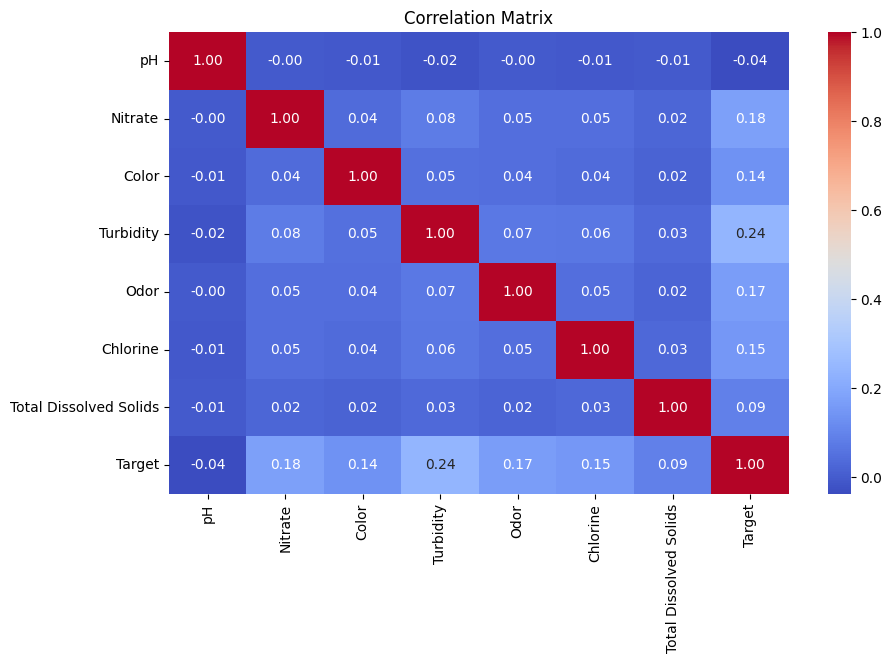

In [4]:
# Convert categorical columns to numeric (e.g., 'Color' column)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
filtered_data['Color'] = label_encoder.fit_transform(filtered_data['Color'])

# Check if the data is now numeric
filtered_data.info()

# Cell 6: Data visualization - Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)


In [10]:
# Cell 7: Split the data into features and target
X = filtered_data.drop('Target', axis=1)
y = filtered_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cell 8: Build and train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42)  # Increased max_iter for convergence
logistic_model.fit(X_train, y_train)

# Cell 9: Evaluate the model
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred) * 100  # Convert accuracy to percentage
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Accuracy: 78.70%
Precision: 0.6353
Recall: 0.1850
F1 Score: 0.2865
ROC AUC: 0.7431


#Trying to improve accuracy

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 78.70%
Precision: 0.6353
Recall: 0.1850
F1 Score: 0.2865
ROC AUC: 0.7431


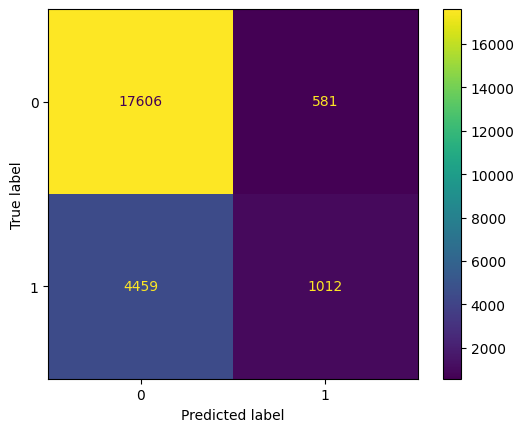

In [12]:
# Cell 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Cell 2: Preprocess the data
# Assuming 'filtered_data' is your cleaned DataFrame
X = filtered_data.drop('Target', axis=1)
y = filtered_data['Target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (try without this step too if performance drops)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Cell 3: Hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],  # Adjust the range for regularization strength
    'penalty': ['l2'],  # 'l1' penalty requires solver 'liblinear', let's keep it simple with 'l2'
    'solver': ['lbfgs']  # Choose solver that works well with larger datasets
}
grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

# Use the best model from GridSearch
best_model = grid.best_estimator_
print(f"Best Parameters: {grid.best_params_}")

# Cell 4: Train the logistic regression model
best_model.fit(X_train, y_train)

# Cell 5: Evaluate the model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred) * 100  # Convert accuracy to percentage
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Cell 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
